In [129]:
import glob
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [9]:
no_smile=glob.glob("data/non_smile/*.jpg")

In [10]:
type(no_smile)

list

In [11]:
no_smile[0]

'data/non_smile\\Aaron_Eckhart_0001.jpg'

In [12]:
smile=glob.glob("data/smile/*.jpg")

In [13]:
test=glob.glob("data/test/*.jpg")

In [14]:
len(smile),len(no_smile),len(test)

(600, 603, 12030)

In [20]:
img=Image.open(smile[0])

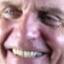

In [21]:
img

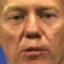

In [23]:
Image.open(no_smile[37])

In [25]:
img1=Image.open(no_smile[65]).convert('L')

In [34]:
type(np.array(img1))

numpy.ndarray

In [99]:
data=[]
lables=[]

In [100]:
for image in no_smile:
    img=Image.open(image)
    img=img.convert('L')
    img=np.array(img).flatten()
    data.append(img)
    lables.append(0)

In [90]:
len(data),len(lables)

(603, 603)

In [101]:
for image in smile:
    img=Image.open(image)
    img=img.convert('L')
    img=np.array(img).flatten()
    data.append(img)
    lables.append(1)

In [102]:
len(data),len(lables)

(1203, 1203)

In [103]:
type(data)

list

In [104]:
X=np.array(data)

In [55]:
type(data)

list

In [105]:
type(X)

numpy.ndarray

In [106]:
Y=np.array(lables)

In [107]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42,shuffle=True)

In [108]:
type(X_train)

numpy.ndarray

In [96]:
X_train[0]

array([[ 97, 112, 127, ..., 131, 116, 102],
       [106, 114, 122, ..., 133, 115, 100],
       [116, 119, 121, ..., 138, 118,  99],
       ...,
       [111, 109, 106, ...,  11,  11,  12],
       [107, 106, 103, ...,  12,  12,  14],
       [104, 103, 101, ...,  12,  12,  13]], dtype=uint8)

In [109]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler();

In [110]:
X_train.shape

(962, 4096)

In [111]:
X_test.shape

(241, 4096)

In [112]:
X_train[0]

array([ 97, 112, 127, ...,  12,  12,  13], dtype=uint8)

In [116]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit on training data only
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler on test data (NO fit!)
X_test_scaled = scaler.transform(X_test)

In [117]:
X_train_scaled[0]

array([-0.02540282,  0.19722396,  0.4011609 , ..., -1.43245076,
       -1.41053727, -1.37453322])

In [119]:
model=LogisticRegression()

In [120]:
model.fit(X_train_scaled,Y_train)

LogisticRegression()

In [121]:
Y_pred=model.predict(X_test_scaled)

In [122]:
Y_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1])

In [123]:
model.predict_proba(X_test_scaled)

array([[6.95385952e-06, 9.99993046e-01],
       [2.30101499e-01, 7.69898501e-01],
       [9.89954938e-01, 1.00450619e-02],
       [2.96229707e-11, 1.00000000e+00],
       [1.00000000e+00, 6.33333786e-12],
       [9.94252682e-01, 5.74731828e-03],
       [2.75175122e-07, 9.99999725e-01],
       [9.99995294e-01, 4.70611699e-06],
       [4.74673523e-09, 9.99999995e-01],
       [1.93305384e-04, 9.99806695e-01],
       [5.57950717e-03, 9.94420493e-01],
       [3.61843513e-08, 9.99999964e-01],
       [9.99999908e-01, 9.22715785e-08],
       [9.91507735e-01, 8.49226531e-03],
       [9.99999999e-01, 6.57235366e-10],
       [9.99999926e-01, 7.36525260e-08],
       [2.84461934e-02, 9.71553807e-01],
       [9.99922653e-01, 7.73470802e-05],
       [1.95145456e-08, 9.99999980e-01],
       [9.99993893e-01, 6.10698101e-06],
       [4.03573730e-09, 9.99999996e-01],
       [1.33518584e-02, 9.86648142e-01],
       [9.96992256e-01, 3.00774439e-03],
       [3.69499260e-08, 9.99999963e-01],
       [9.996481

In [125]:
accuracy=accuracy_score(Y_test,Y_pred)
print(f"Model Accuracy: (accuracy: 4f)")
print("confusion Matrix:\n",confusion_matrix(Y_test,Y_pred))
print("Classification Report:\n",classification_report(Y_test,Y_pred))

Model Accuracy: (accuracy: 4f)
confusion Matrix:
 [[114  12]
 [ 14 101]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.90       126
           1       0.89      0.88      0.89       115

    accuracy                           0.89       241
   macro avg       0.89      0.89      0.89       241
weighted avg       0.89      0.89      0.89       241



In [126]:
# Define parameter grid
param_grid = {
    'penalty' : ['l1','l2', 'elasticnet'],
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs', 'sag', 'saga', 'newton-cg']
}

In [127]:
log_reg = LogisticRegression()

In [130]:
cv = StratifiedKFold()

In [135]:
# Perform grid search
grid_search = GridSearchCV(log_reg, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, Y_train)

C:\Users\Mohana Prasath\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
200 fits failed out of a total of 375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Mohana Prasath\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Mohana Prasath\anaconda3\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\Mohana Prasath\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'lbfgs', 'sag', 'saga',
                                    'newton-cg']},
             scoring='accuracy')

In [133]:
grid_search.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}

In [134]:
grid_search.best_score_

np.float64(0.8814550949913645)

In [136]:
tuned_model = grid_search.best_estimator_

In [137]:
y_pred = tuned_model.predict(X_test_scaled)

In [ ]:
# 📌 Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

In [140]:
import pickle

In [141]:
pickle.dump(tuned_model, open('my_model.pkl', 'wb'))

In [142]:
pickle.dump(scaler, open('my_scaler.pkl', 'wb'))

In [ ]:
from sklearn.preprocessing import StandardScaler
import joblib

scaler = StandardScaler().fit(X_train)
joblib.dump(scaler, "scaler.pkl")


['smile_stalker.pkl']